In [ ]:
#@title 1. Импорт библиотек и данных

from google.colab import files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn import metrics

from sklearn.model_selection import cross_validate

In [ ]:
# uploaded = files.upload()

# !mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
# !kaggle competitions download -c urfuengaiml2022clustering

# !unzip urfuengaiml2022clustering.zip

  0% 0.00/953k [00:00<?, ?B/s]
100% 953k/953k [00:00<00:00, 128MB/s]
Archive:  urfuengaiml2022clustering.zip
  inflating: Data.csv                
  inflating: Submission.csv          


In [ ]:
DF_train = pd.read_csv('/content/Data.csv', delimiter = ',', index_col = 0) #данные для обучения
Submission = pd.read_csv('/content/Submission.csv', delimiter = ',', index_col = 0) #форма для получившегося результата

DF_train

,Признак 1,Признак 2,Признак 3,Признак 4,Признак 5
idx,,,,,
0,-0.179369,-0.013356,0.016641,-0.325923,-0.031094
1,-0.157893,-0.010647,0.002895,-0.332016,-0.012547
2,-0.249451,-0.011700,-0.001435,-0.487909,-0.005343
3,-0.158938,0.210980,0.021905,-0.334196,-0.013976
4,-0.687836,0.422630,0.054028,0.719132,-0.038392
...,...,...,...,...,...
19915,-0.600084,-0.011454,-0.024991,0.700872,0.018778
19916,-0.081612,-0.001023,-0.045937,-0.353670,0.053334
19917,-0.028544,0.002083,-0.048065,-0.493040,0.062817


In [ ]:
#@title 2. Анализ данных

DF_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19033 entries, 0 to 19920
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Признак 1  19033 non-null  float64
 1   Признак 2  19033 non-null  float64
 2   Признак 3  19033 non-null  float64
 3   Признак 4  19033 non-null  float64
 4   Признак 5  19033 non-null  float64
dtypes: float64(5)
memory usage: 892.2 KB


In [ ]:
DF_train.describe() #оценим числовые характеристики данных

,Признак 1,Признак 2,Признак 3,Признак 4,Признак 5
count,1.903300e+04,1.903300e+04,1.903300e+04,1.903300e+04,1.903300e+04
mean,1.567950e-17,5.039840e-17,-8.922383e-17,1.657547e-16,3.434557e-17
std,5.372720e-01,6.612815e-02,6.395875e-02,4.809839e-01,5.676626e-02
min,-8.865561e-01,-4.705258e-02,-3.499009e-01,-5.417184e-01,-3.695438e-01
25%,-2.556412e-01,-1.392043e-02,-2.251187e-02,-4.636834e-01,-1.943088e-02
50%,-1.527072e-01,-9.348055e-03,3.760155e-03,-1.193854e-01,2.740698e-03
75%,1.387202e-01,-5.841646e-03,2.707801e-02,3.591970e-01,2.958351e-02
max,1.048308e+00,9.805234e-01,3.976242e-01,1.067578e+00,4.547306e-01


In [ ]:
columns = ['Признак 1', 'Признак 2', 'Признак 3', 'Признак 4', 'Признак 5']

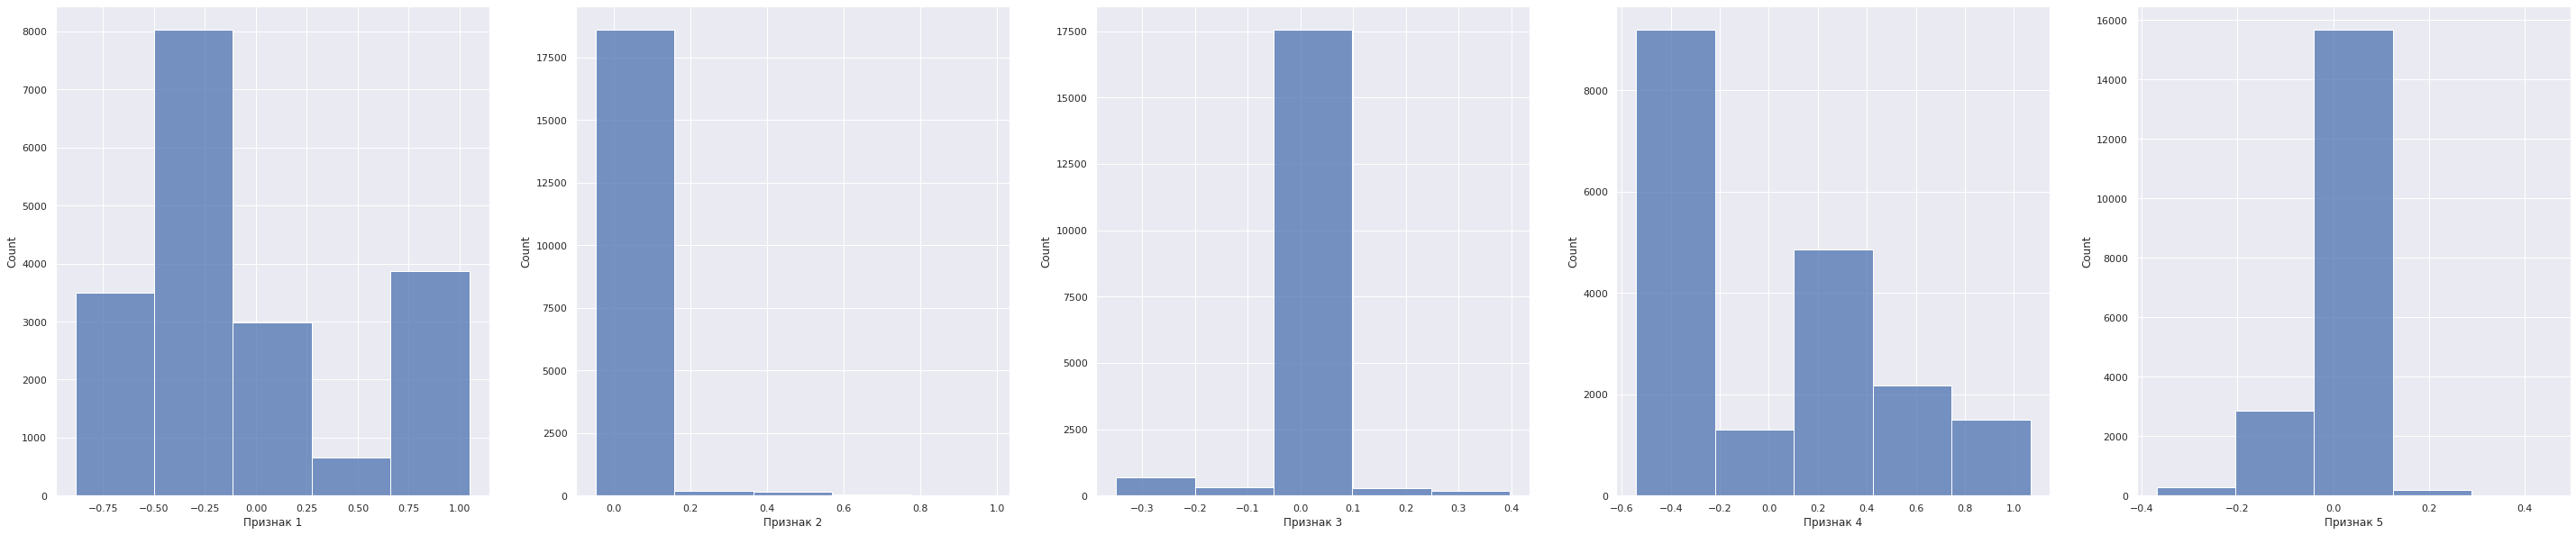

In [ ]:
width = 5 #построим гистограммы данных
height = int(np.ceil(len(columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(50,10))

for idx, column_name in enumerate(columns):
    plt.subplot(height,width, idx+1)

    sns.histplot(data=DF_train, x=column_name, bins = 5);

Визуализируем совместное распределение каждой пары из данных величин:

<Figure size 1080x1080 with 0 Axes>

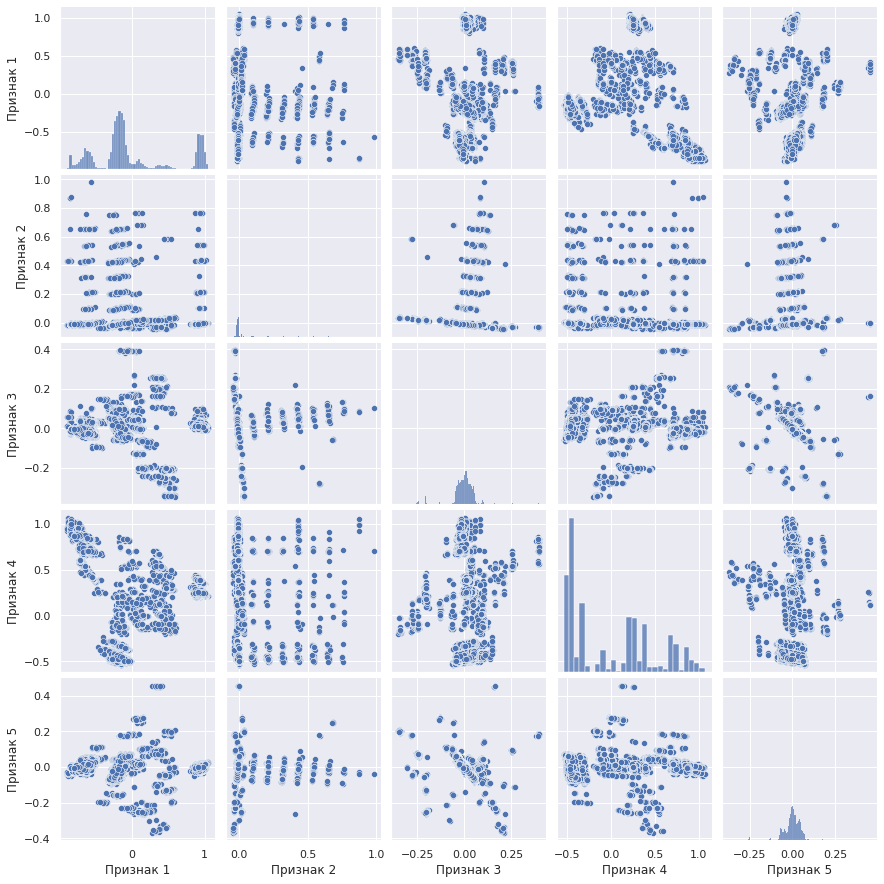

In [ ]:
fig = plt.figure(figsize=(15,15))
sns.pairplot(data = DF_train, palette = 'bwr',);

Перспективнее всего выглядит комбинации признаков 1-3 (4/5 кластеров), 3-4 (4 кластера), 1-4 (3/4 кластера). Проверим их:

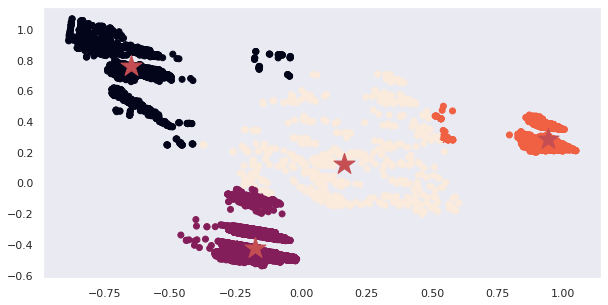

In [ ]:
#@title Обучение модели
По_x =  1 #@param {type:"slider", min:1, max:5, step:1}
По_y = 3 #@param {type:"slider", min:1, max:5, step:1}
#@markdown ### Число Кластеров
k = 4 #@param {type:"slider", min:2, max:10, step:1}

X_cluster = DF_train.loc[:,['Признак '+str(По_x), 'Признак '+str(По_y)]].values

km = KMeans(n_clusters=k)
km.fit(X_cluster)
centroids = km.cluster_centers_
labels = km.fit_predict(X_cluster)
label_centroids = km.fit_predict(centroids)

plt.figure(figsize=(10, 5))
plt.scatter(X_cluster[:, 0], X_cluster[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=490)
plt.grid();

Метрики

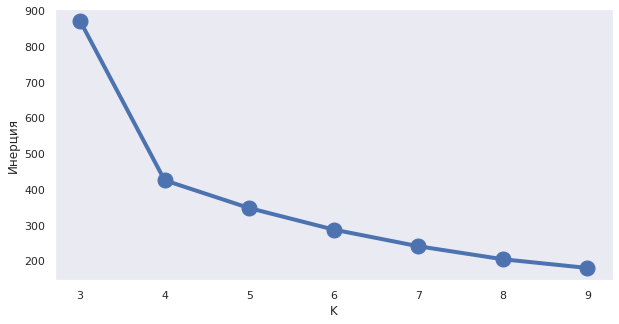

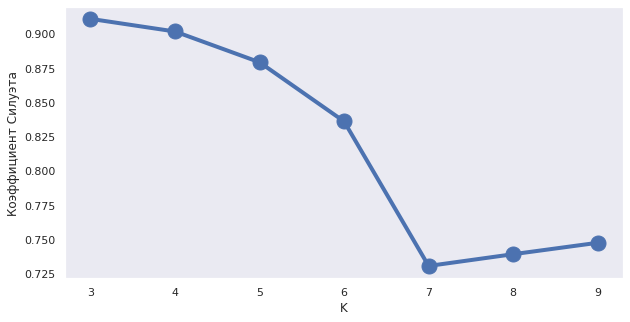

In [ ]:
sse = []
sil_scor = []
list_k = list(range(3, 10))
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_cluster)
    sse.append(km.inertia_)
    labels = km.fit_predict(X_cluster)
    sil_scor.append(metrics.silhouette_score(X_cluster, labels, metric='sqeuclidean'))

plt.figure(figsize=(10, 5))
plt.plot(list_k, sse, '-o',linewidth=4, markersize=15)
plt.grid()
plt.xlabel('K')
plt.ylabel('Инерция');
plt.figure(figsize=(10, 5))
plt.plot(list_k, sil_scor, '-o',linewidth=4, markersize=15)
plt.grid()
plt.xlabel('K')
plt.ylabel('Коэффициент Силуэта');

Результаты:

Комбинации:

1.   1/3: оптимально К=4, инерция=200
2.   4/3: оптимально К=4, инерция=200
3.   1/4: оптимально К=4, инерция=400

В качестве итогового используем первый вариант.



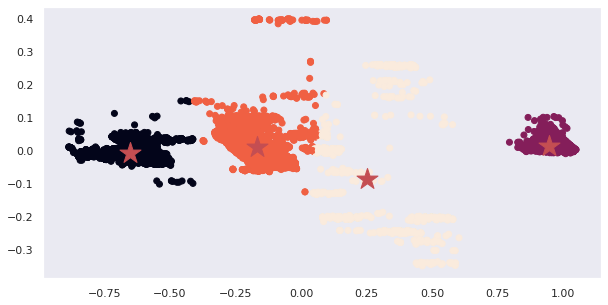

In [ ]:
По_x =  1 #@param {type:"slider", min:1, max:5, step:1}
По_y = 3 #@param {type:"slider", min:1, max:5, step:1}
#@markdown ### Число Кластеров
k = 4 #@param {type:"slider", min:2, max:10, step:1}

X_cluster = DF_train.loc[:,['Признак '+str(По_x), 'Признак '+str(По_y)]].values

km = KMeans(n_clusters=k)
km.fit(X_cluster)
centroids = km.cluster_centers_
labels = km.fit_predict(X_cluster)
label_centroids = km.fit_predict(centroids)

plt.figure(figsize=(10, 5))
plt.scatter(X_cluster[:, 0], X_cluster[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=490)
plt.grid();

In [ ]:
Submission.label = labels #сохраним данные

Поставим в соответствие наименьшим номерам кластера наибольшее количество значений:

In [ ]:
Submission.label.value_counts() #Соответствие по преобразования

2    10133
1     3865
0     3559
3     1476
Name: label, dtype: int64

In [ ]:
Submission.label = Submission.label.map({0:2, 1:1, 2:0, 3:3}) #преобразование
Submission.label.value_counts() #результат

0    10133
1     3865
2     3559
3     1476
Name: label, dtype: int64

In [ ]:
Submission.to_csv('Submission.csv', index=True) #cохраним данные КАБАЧОК